<a href="https://colab.research.google.com/github/khosyrobbin/Big-Data/blob/main/UAS_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
.master("local")\
.appName("Colab")\
.config('spark.ui.port', '4050')\
.getOrCreate()

In [ ]:
df = spark.read.json("/content/drive/MyDrive/BIG DATA/uas.json")

In [ ]:
df.show()

+-----+--------------+---------------+------------+-----+
| code|   description|      marketcap|        name|price|
+-----+--------------+---------------+------------+-----+
|     |              |               |            |     |
|  BTC|1st generation|383,629,943,176|     Bitcoin|20000|
|  ETH|2st generation|135,006,892,320|    Ethereum| 1110|
|  BNB|3st generation| 35,677,864,722|     Binance|  218|
|  ADA|3st generation| 15,823,692,606|     Cardano|    1|
|  FTX|3st generation|  3,408,284,930|   FTX token|   25|
|  SOL|3st generation| 11,879,768,579|      Solana|   33|
|  UNI|3st generation|  3,677,071,886|     Uniswap|    9|
| DOGE|1st generation|  8,864,757,498|    Dogecoin|  0.3|
| SHIB|     NFT token|  5,378,294,121|       Shiba|0.003|
|  DOT|3st generation|  7,100,179,843|    Polkadot|  8.2|
|  TRX|3st generation|  6,032,490,382|        Tron|  0.1|
|MATIC|3st generation|  4,040,185,880|     Polygon|  0.8|
|  LTC|3st generation|  3,723,150,437|    Litecoin|   11|
| ALGO|3st gen

In [ ]:
df.select("name", "code", "price").show(5)

+--------+----+-----+
|    name|code|price|
+--------+----+-----+
|        |    |     |
| Bitcoin| BTC|20000|
|Ethereum| ETH| 1110|
| Binance| BNB|  218|
| Cardano| ADA|    1|
+--------+----+-----+
only showing top 5 rows



In [ ]:
df_filtered = df.filter("price > 10 AND name IS NOT NULL")
df_filtered.select("name", "price", "marketcap").show(5,False)

+---------+-----+---------------+
|name     |price|marketcap      |
+---------+-----+---------------+
|Bitcoin  |20000|383,629,943,176|
|Ethereum |1110 |135,006,892,320|
|Binance  |218  |35,677,864,722 |
|FTX token|25   |3,408,284,930  |
|Solana   |33   |11,879,768,579 |
+---------+-----+---------------+
only showing top 5 rows



In [ ]:
df.groupby('description').count().sort(df.description).show()

+--------------+-----+
|   description|count|
+--------------+-----+
|              |    1|
|1st generation|    2|
|2st generation|    1|
|3st generation|   13|
|     NFT token|    5|
+--------------+-----+



In [ ]:
from pyspark.sql.functions import *
maxValue = df_filtered.agg(max("marketcap")).collect()[0][0]
print("Highest MarketCap: ",maxValue)
df_filtered.select("code","marketcap","price").filter(df.marketcap == maxValue).show(5, False)

Highest MarketCap:  383,629,943,176
+----+---------------+-----+
|code|marketcap      |price|
+----+---------------+-----+
|BTC |383,629,943,176|20000|
+----+---------------+-----+



In [ ]:
minValue = df_filtered.agg(min("marketcap")).collect()[0][0]
print("Minimal MarketCap: ",minValue)
df_filtered.select("code","marketcap","price").filter(df.marketcap == minValue).show(5, False)

Minimal MarketCap:  1,352,667,846
+----+-------------+-----+
|code|marketcap    |price|
+----+-------------+-----+
|XTZ |1,352,667,846|23   |
+----+-------------+-----+



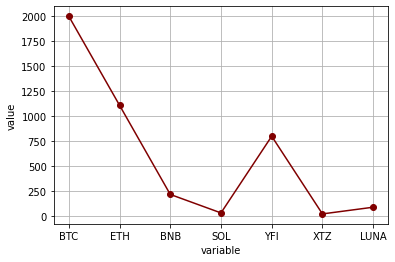

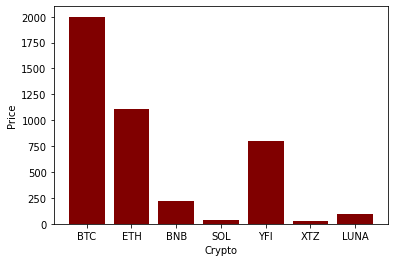

In [ ]:
import matplotlib.pyplot as plt
import json

dictionary = json.load(open('report.json', 'r'))
xAxis = [key for key, value in dictionary.items()]
yAxis = [value for key, value in dictionary.items()]
plt.grid(True)

## LINE GRAPH ##
plt.plot(xAxis,yAxis, color='maroon', marker='o')
plt.xlabel('variable')
plt.ylabel('value')

## BAR GRAPH ##
fig = plt.figure()
plt.bar(xAxis,yAxis, color='maroon')
plt.xlabel('Crypto')
plt.ylabel('Price')

plt.show()